# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
data = pd.read_csv('data/auto_mpg_dataset.csv')


In [3]:
# Display the first 5 rows
data.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [4]:
# Summary statistics (using .describe())
data.describe().round(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,5.45,193.43,-1404.64,2970.42,15.57,76.01,1.57,23.51
std,1.70,104.27,12213.42,846.84,2.76,3.70,0.80,7.82
min,3.00,68.00,-100000.00,1613.00,8.00,70.00,1.00,9.00
25%,4.00,104.25,75.00,2223.75,13.82,73.00,1.00,17.50
50%,4.00,148.50,92.00,2803.50,15.50,76.00,1.00,23.00
75%,8.00,262.00,125.00,3608.00,17.18,79.00,2.00,29.00
max,8.00,455.00,230.00,5140.00,24.80,82.00,3.00,46.60


## Data Cleaning

In [5]:
data.shape

(398, 9)

In [6]:
# Check the datatypes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    float64
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   car_name      398 non-null    object 
 8   mpg           398 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [7]:
# Check for null values
data.isnull().sum()


cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
mpg             0
dtype: int64

In [8]:
# Drop the non-numerical column
data = data.drop(labels='car_name', axis=1)



In [25]:
data

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


## Correlations

In [10]:
# Get correlations for numeric data
corr = data.corr(numeric_only=True)
corr

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.067952,0.035575,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.067952,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,0.035575,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,0.579267,0.563450,1.000000


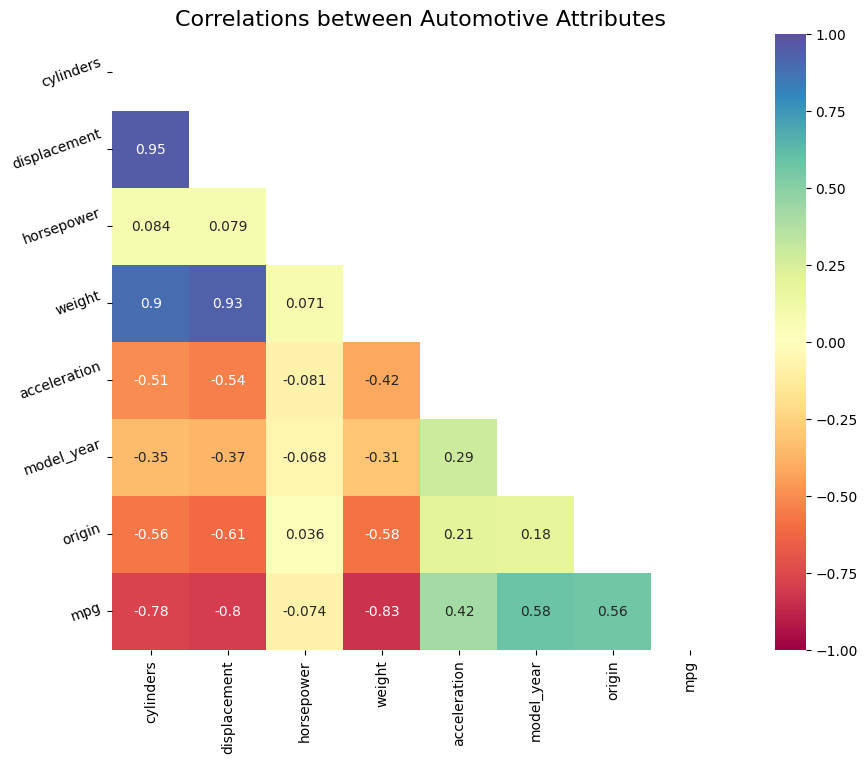

In [11]:
# Create a heatmap
#plt.figure(figsize=(16, 10))
plt.figure(figsize= (12, 8))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            square=True,
            cmap='Spectral',
            annot=True,
            vmax=1,
            vmin=-1,
            mask=mask,
            )

plt.title('Correlations between Automotive Attributes', fontsize = 16)
plt.yticks(rotation = 20);



In [12]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
data.corr(numeric_only=True)[['mpg']].sort_values('mpg', ascending=False)



,mpg
mpg,1.000000
model_year,0.579267
origin,0.563450
acceleration,0.420289
horsepower,-0.073501
cylinders,-0.775396
displacement,-0.804203
weight,-0.831741


For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

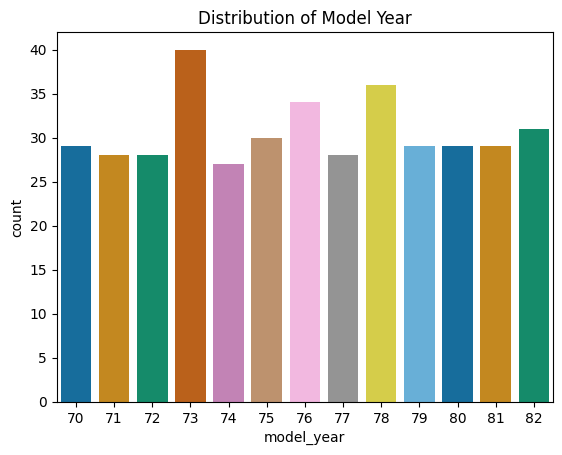

In [13]:
sns.countplot(data, x='model_year', hue= data['model_year'], legend=False, palette='colorblind')
plt.title('Distribution of Model Year');

**Distribution of Origin**

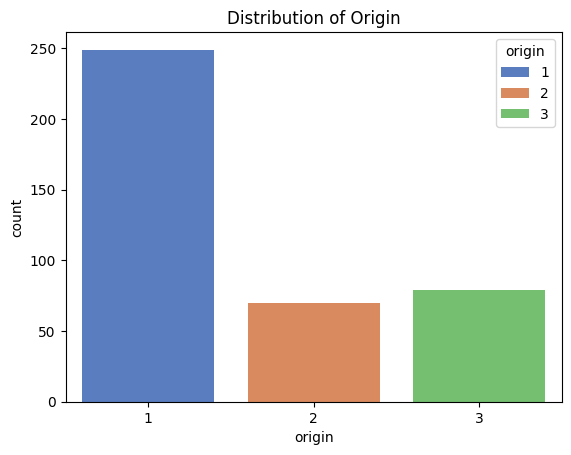

In [14]:
sns.countplot(data, x='origin', hue=data['origin'], palette='muted')
plt.title('Distribution of Origin');

**Distribution of Cylinders**

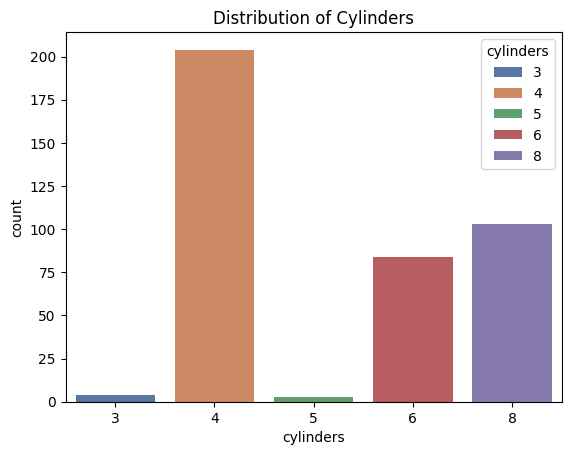

In [15]:
sns.countplot(data, x='cylinders', hue=data['cylinders'], palette='deep')
plt.title('Distribution of Cylinders');

## Boxplots/Histograms

**MPG Distribution**

I have done both histplot and boxplot for mpg distribution. I think the histplot works better for this one.

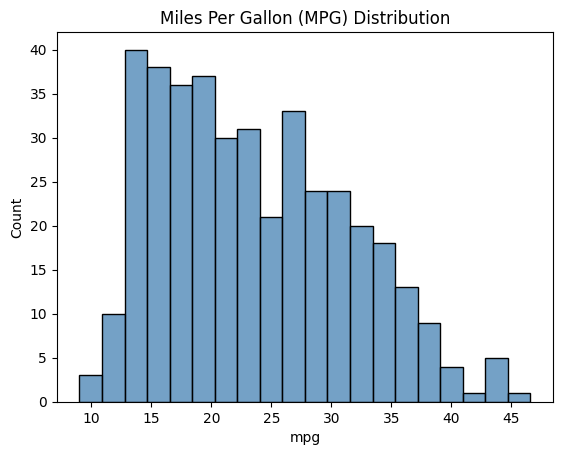

In [16]:
sns.histplot(data['mpg'], color='steelblue', bins=20)
plt.title('Miles Per Gallon (MPG) Distribution');

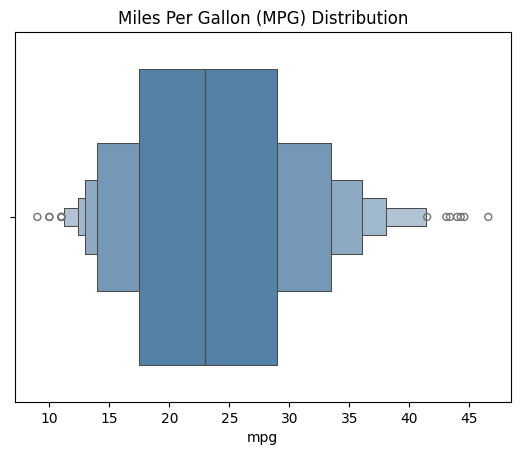

In [17]:
sns.boxenplot(x = data['mpg'], color='steelblue')
plt.title('Miles Per Gallon (MPG) Distribution');

**Weight Distribution**

I have done both histplot and boxplot for weight distribution. I think the boxplot works better for this one.

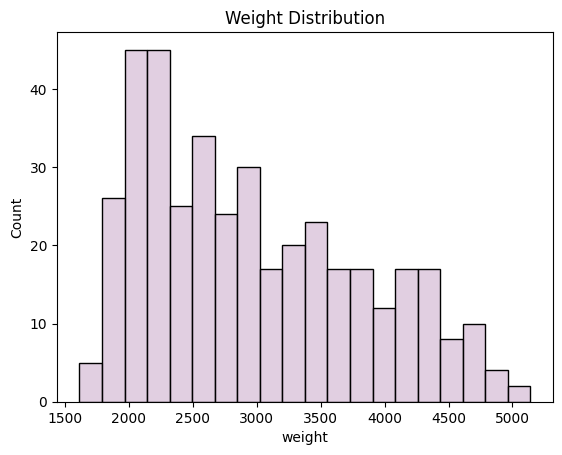

In [18]:
sns.histplot(data['weight'], color='thistle', bins=20)
plt.title('Weight Distribution');

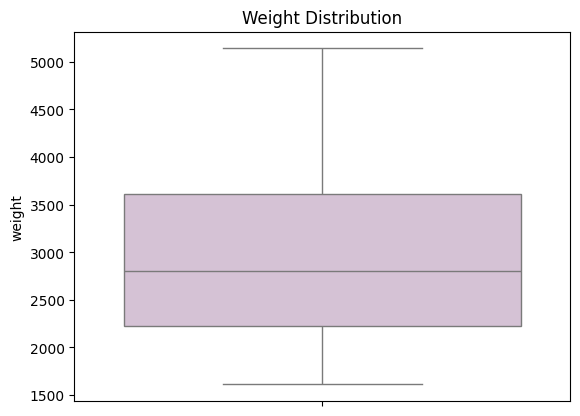

In [19]:
sns.boxplot(data['weight'], color='thistle')
plt.title('Weight Distribution');


## Scatterplots

**Weight vs. MPG**

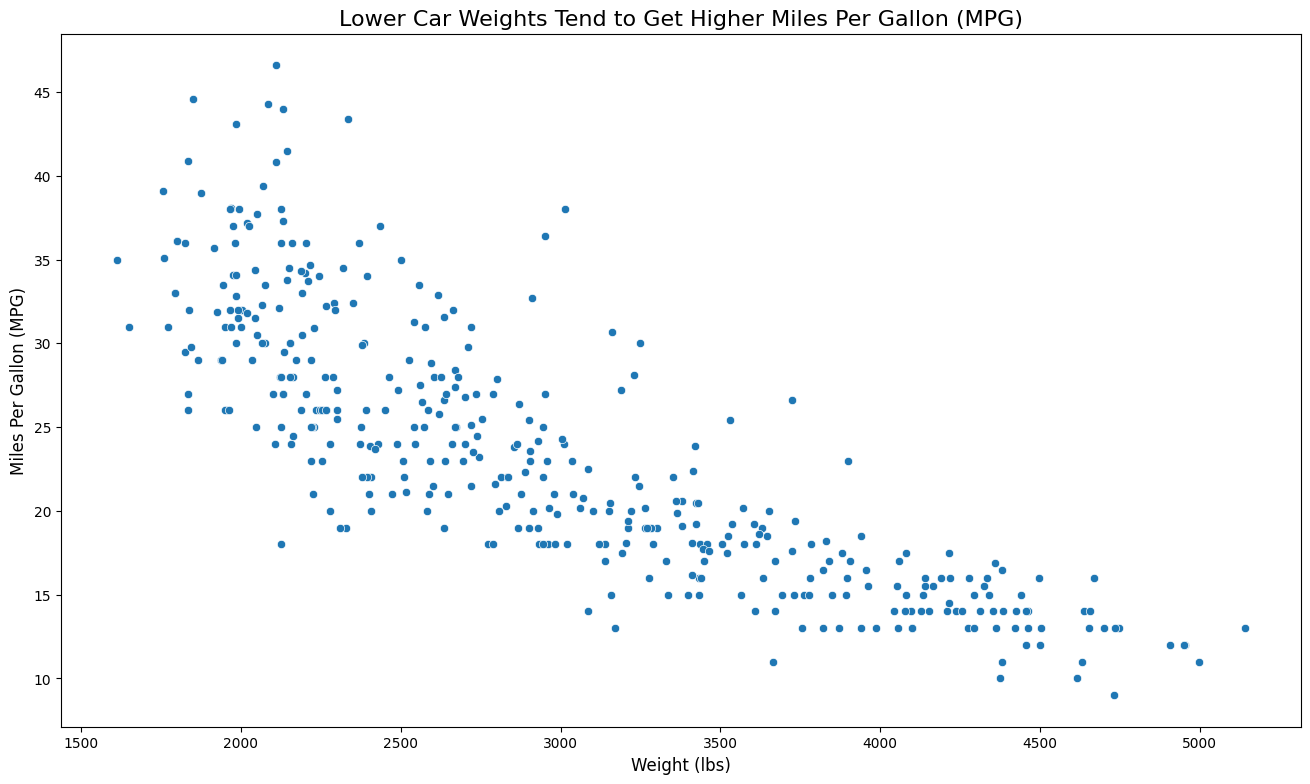

In [24]:
plt.figure(figsize=(16,9))

sns.scatterplot(x= data['weight'],
                y= data['mpg'])

plt.title('Lower Car Weights Tend to Get Higher Miles Per Gallon (MPG)', fontsize= 16)

plt.xlabel('Weight (lbs)', fontsize = 12)
plt.ylabel('Miles Per Gallon (MPG)', fontsize= 12);


## Your turn!

Text(0.5, 1.0, 'Distribution of Acceleration')

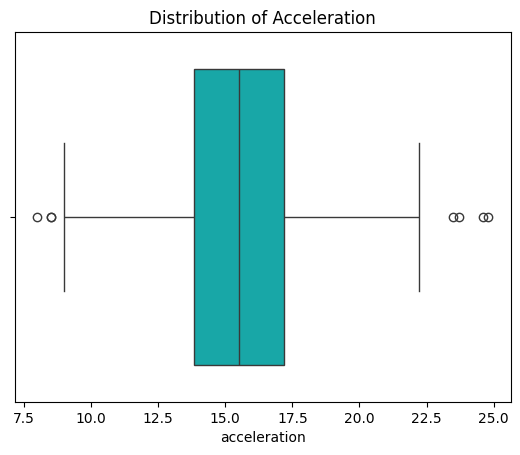

In [65]:
sns.boxplot(x = data['acceleration'], color='c')
plt.title('Distribution of Acceleration')


The median falls just above 15.0 for acceleration. There also seems to be a few outliers which would warrant further analysis to determine if weight or horsepower have any impact on the outliers.

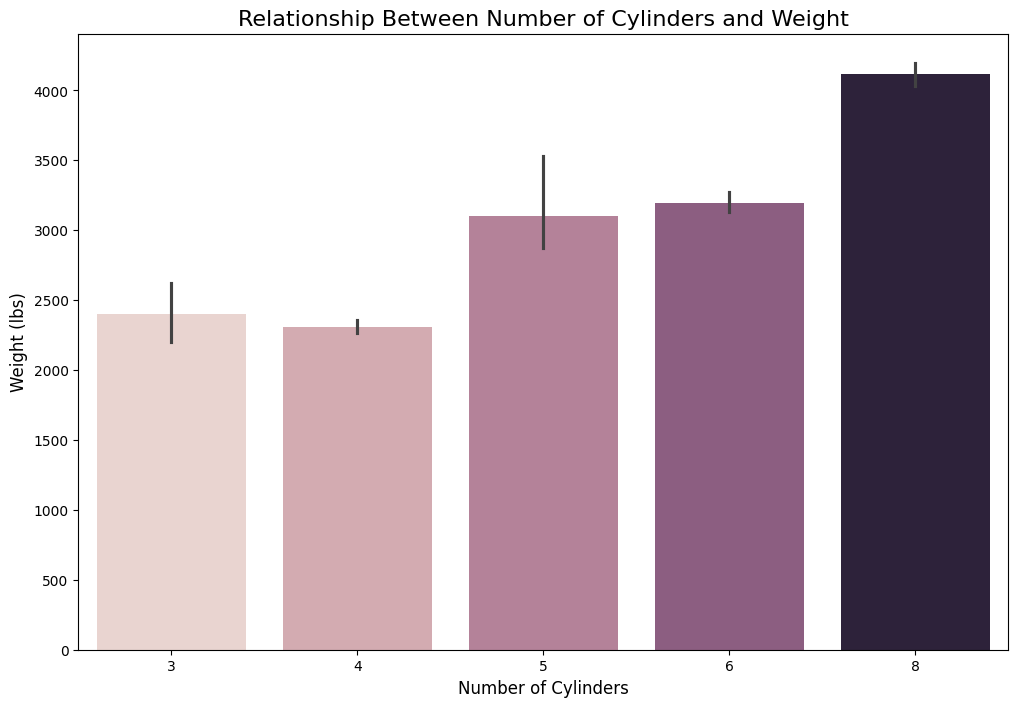

In [53]:
plt.figure(figsize=(12,8))

sns.barplot(x= data['cylinders'],
                y= data['weight'],
                hue= data['cylinders'],
                legend=False)

plt.title('Relationship Between Number of Cylinders and Weight', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize= 12)
plt.ylabel('Weight (lbs)', fontsize = 12);

The number of cylinders increase as the weight of the car increases.

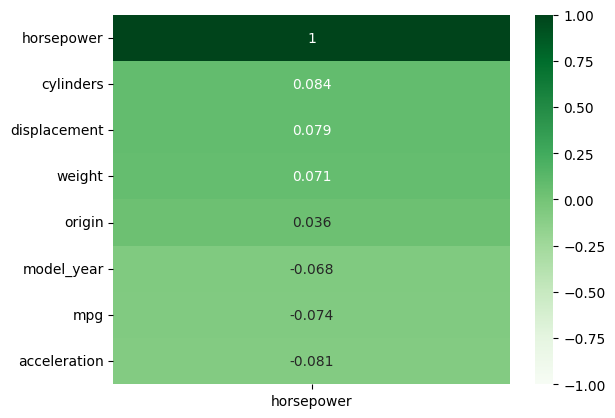

In [60]:
sns.heatmap(data.corr(numeric_only=True)[['horsepower']].sort_values('horsepower', ascending=False),
            annot= True,
            vmax=1,
            vmin=-1,
            cmap='Greens');

It appears that cylinders has the highest correlation to horsepower.